# Avacado Project

In [141]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [142]:
#import the dataset
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [143]:
#renameing the the columns
header=['Unnamed: 0','Date','AveragePrice','Total_Volume','PLU4046','PLU4225','PLU4770','Total_Bags','Small_Bags', 'Large_Bags', 'XLarge_Bags', 'type','year','region']

In [144]:
df.columns=header

## Pre Processing

In [145]:
# checking the shape of the dataset
df.shape

(18249, 14)

In [146]:
#checking the total columns present 
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total_Volume', 'PLU4046',
       'PLU4225', 'PLU4770', 'Total_Bags', 'Small_Bags', 'Large_Bags',
       'XLarge_Bags', 'type', 'year', 'region'],
      dtype='object')

In [147]:
# checking the unique value of categorical column
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [148]:
# checking the unique value of categorical column
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [149]:
# checking the information and datatypes of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total_Volume  18249 non-null  float64
 4   PLU4046       18249 non-null  float64
 5   PLU4225       18249 non-null  float64
 6   PLU4770       18249 non-null  float64
 7   Total_Bags    18249 non-null  float64
 8   Small_Bags    18249 non-null  float64
 9   Large_Bags    18249 non-null  float64
 10  XLarge_Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [150]:
# checking any null values are present in any columns
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total_Volume    0
PLU4046         0
PLU4225         0
PLU4770         0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge_Bags     0
type            0
year            0
region          0
dtype: int64

In [152]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Unnamed: 0,Date,AveragePrice,Total_Volume,PLU4046,PLU4225,PLU4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region


In [153]:
# Adding month to the dataset

df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Unnamed: 0,Date,AveragePrice,Total_Volume,PLU4046,PLU4225,PLU4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [156]:
df.describe()

,AveragePrice,Total_Volume,PLU4046,PLU4225,PLU4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year,month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


### Observations
* There are no nulls values
* the dataset consist of 18249 rows and 14 columns
* PLU4046,PLU4225,PLU4770,Total_bags,Small_bags,Large_bags,Xlarge_bags contains zero which is not possible 
* the data we observe is skewed

In [154]:
#Removing unncessary columns
df.drop(['Unnamed: 0' , 'Date'],axis=1,inplace = True)

## EDA and Visualization

********************
conventional    9126
organic         9123
Name: type, dtype: int64
********************


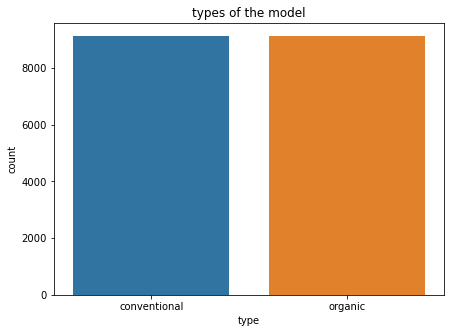

In [155]:
# Seeing which car sold most
plt.figure(figsize=(7,5))
sns.countplot(x='type' , data=df)
plt.title('types of the model')
print('*'*20)
print(df.type.value_counts())
print('*'*20)
plt.show()

### So there are only 2 types [Coventional and organic] of Avocado and both are in equal quantity.

********************
0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64
********************


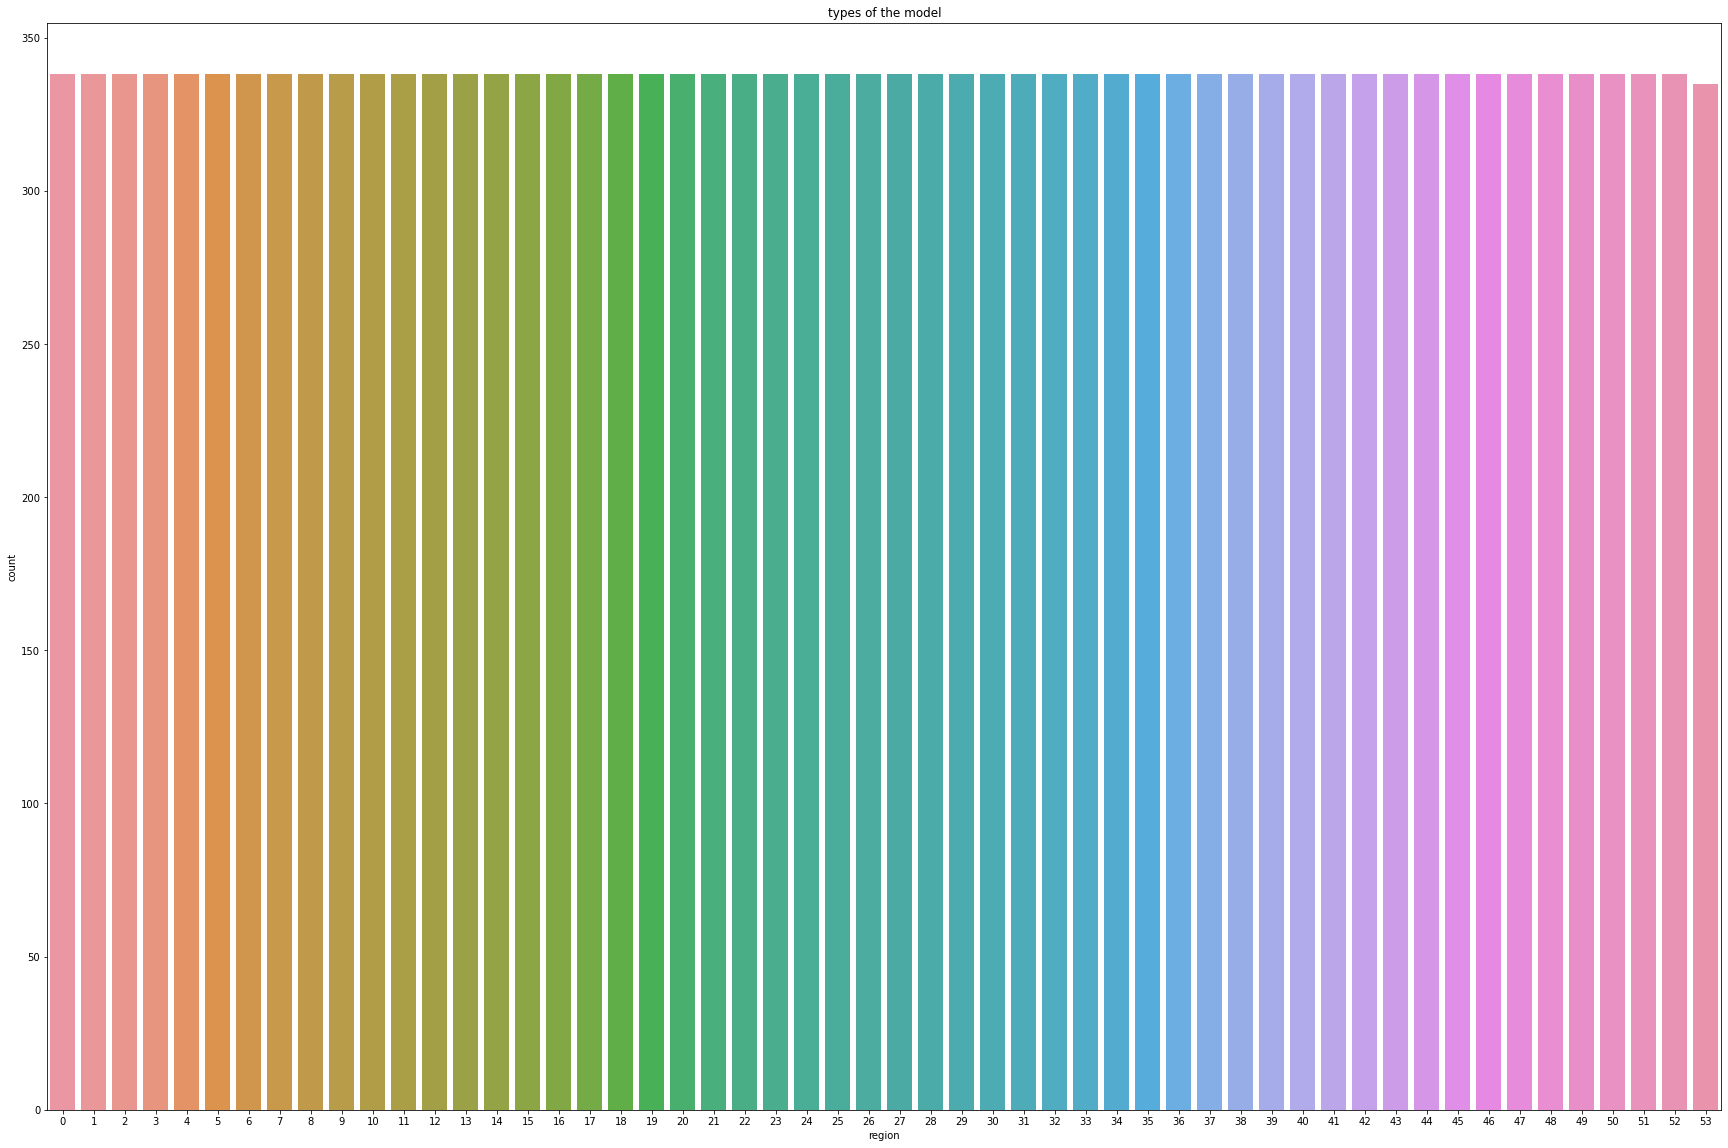

In [125]:
# Seeing which car sold most
plt.figure(figsize=(30,20))
sns.countplot(x='region' , data=df)
plt.title('types of the model')
print('*'*20)
print(df.region.value_counts())
print('*'*20)
plt.show()

### So there are 53 unique numbers of cities and the value counts for all cities are equal.

Text(0.5, 1.0, 'price vs PLU4046')

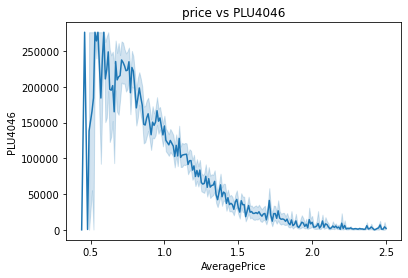

In [126]:
sns.lineplot(x='AveragePrice' , y='PLU4046' , data=df)
plt.title('price vs PLU4046')

### So the average price for 4046 is around 0.75 to 1.2

Text(0.5, 1.0, 'price vs PLU4225')

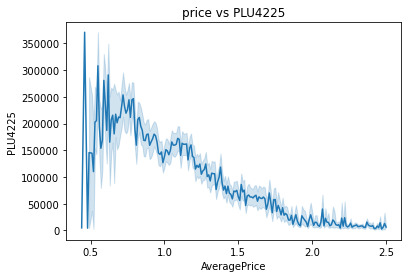

In [127]:
sns.lineplot(x='AveragePrice' , y='PLU4225' , data=df)
plt.title('price vs PLU4225')

### So the average price for 4225 is around 0.75 to 1.5

Text(0.5, 1.0, 'price vs PLU4770')

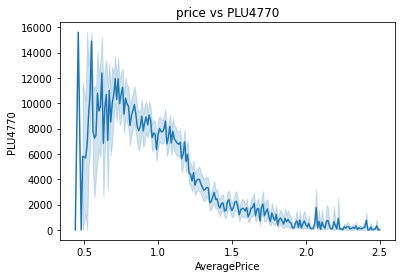

In [128]:
sns.lineplot(x='AveragePrice' , y='PLU4770' , data=df)
plt.title('price vs PLU4770')

### So the average price for 4046 is around 1.0 to 1.2

********************
2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64
********************


(array([0, 1, 2, 3]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

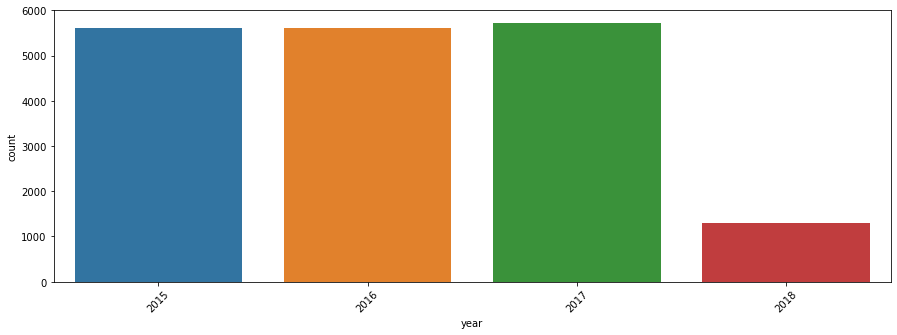

In [129]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'year', data = df)
print('*'*20)
print(df.year.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

### So the count plot shows the avocados sold most in 2017 followed by 2016 and 2015 are same and in 2018 very less number of avocados are sold.

In [131]:
prices = pd.pivot_table(df, values = "AveragePrice", index = "month", columns = "year")
prices

year,2015,2016,2017,2018
month,,,,
1,1.365046,1.240185,1.276537,1.387431
2,1.326944,1.237106,1.214352,1.318704
3,1.361981,1.224213,1.393356,1.336458
4,1.383449,1.205023,1.498222,NaN
5,1.344685,1.199722,1.529699,NaN
6,1.399074,1.283056,1.541302,NaN
7,1.408866,1.401333,1.562815,NaN
8,1.442278,1.411088,1.686875,NaN
9,1.446852,1.426157,1.820486,NaN


<AxesSubplot:title={'center':'Average Avocado Price'}, xlabel='Month', ylabel='Price'>

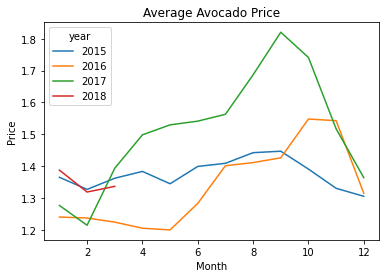

In [132]:
prices.plot.line(title = "Average Avocado Price", ylabel = "Price", xlabel = "Month")

### From the graph, we can observe that the price of Avocados prices tends to increase between July to November each year.

In [133]:
volume = pd.pivot_table(df, values = "Total_Volume", index = "month", columns = "year")
volume

year,2015,2016,2017,2018
month,,,,
1,263160.282778,292361.022093,312335.044148,322068.411632
2,278495.191968,309207.704514,328741.034954,338283.809421
3,270387.878324,299141.304838,294804.873102,331130.830556
4,275036.231944,307977.939977,302619.414398,NaN
5,292835.905694,327359.273000,317781.007002,NaN
6,286167.842072,310105.227616,309604.626070,NaN
7,278382.078102,296450.968370,298378.329028,NaN
8,269500.187583,293164.189086,281151.912130,NaN
9,266835.859317,288249.926574,260942.511910,NaN


<AxesSubplot:title={'center':'Average Volume Sold'}, xlabel='Month', ylabel='Volume'>

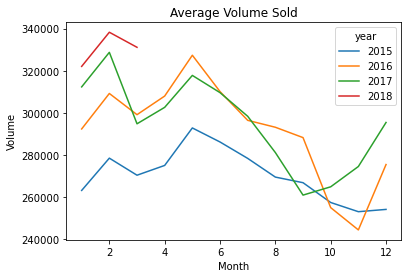

In [134]:
volume.plot.line(title = "Average Volume Sold", ylabel = "Volume", xlabel = "Month")

### From the graph, we can observe that the Volume of avocados sold tends to increase in February and May before decreasing gradually until November.

### Appling Label Encoder 

In [135]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()
df1=le.fit_transform(df['type'])
pd.Series(df1)

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Length: 18249, dtype: int32

In [17]:
df['type']=df1

In [18]:
df2=le.fit_transform(df['region'])
pd.Series(df1)
df['region']=df2

In [19]:
df.head()

,AveragePrice,Total_Volume,PLU4046,PLU4225,PLU4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11


In [20]:
df.dtypes

AveragePrice    float64
Total_Volume    float64
PLU4046         float64
PLU4225         float64
PLU4770         float64
Total_Bags      float64
Small_Bags      float64
Large_Bags      float64
XLarge_Bags     float64
type              int32
year              int64
region            int32
month             int64
dtype: object

## Plotting Heatmap to see co-relation 

In [21]:
corr=df.corr()
corr.shape

(13, 13)

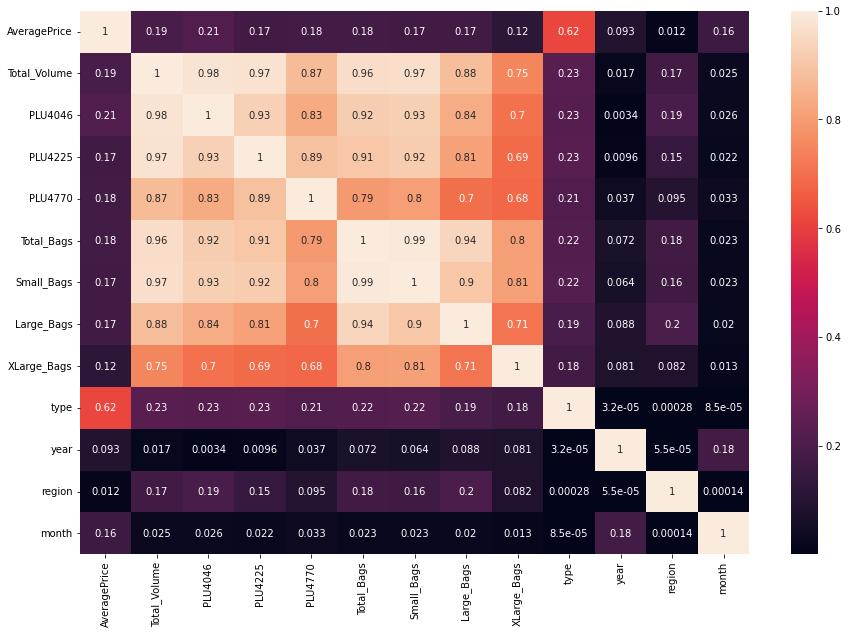

In [22]:
corr=df.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.show()

In [23]:
df.columns

Index(['AveragePrice', 'Total_Volume', 'PLU4046', 'PLU4225', 'PLU4770',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'type', 'year',
       'region', 'month'],
      dtype='object')

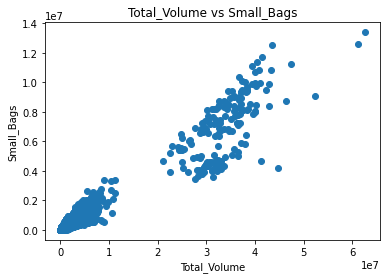

In [24]:
plt.scatter(df['Total_Volume'],df['Small_Bags'])
plt.xlabel('Total_Volume')
plt.ylabel('Small_Bags')
plt.title('Total_Volume vs Small_Bags')
plt.show()

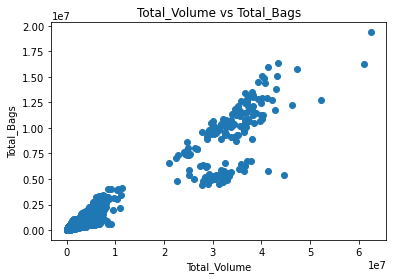

In [25]:
plt.scatter(df['Total_Volume'],df['Total_Bags'])
plt.xlabel('Total_Volume')
plt.ylabel('Total_Bags')
plt.title('Total_Volume vs Total_Bags')
plt.show()

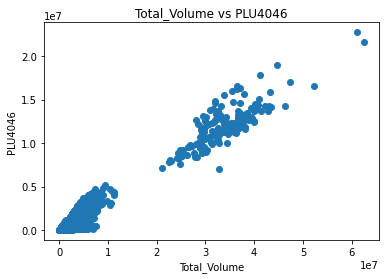

In [26]:
plt.scatter(df['Total_Volume'],df['PLU4046'])
plt.xlabel('Total_Volume')
plt.ylabel('PLU4046')
plt.title('Total_Volume vs PLU4046')
plt.show()

In [136]:
df.columns

Index(['AveragePrice', 'Total_Volume', 'PLU4046', 'PLU4225', 'PLU4770',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'type', 'year',
       'region', 'month'],
      dtype='object')

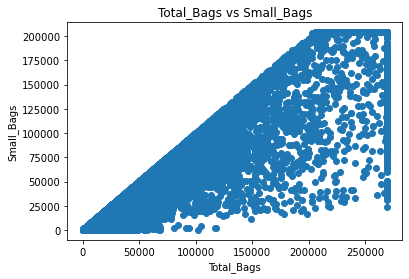

In [139]:
plt.scatter(df['Total_Bags'],df['Small_Bags'])
plt.xlabel('Total_Bags')
plt.ylabel('Small_Bags')
plt.title('Total_Bags vs Small_Bags')
plt.show()

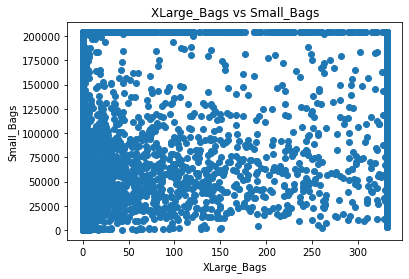

In [140]:
plt.scatter(df['XLarge_Bags'],df['Small_Bags'])
plt.xlabel('XLarge_Bags')
plt.ylabel('Small_Bags')
plt.title('XLarge_Bags vs Small_Bags')
plt.show()

## As we see from the heatmap and scatter plot above, all the Features are not correlated with the Average Price column, instead most of them are correlated with each other. 

### Plotting Histogram plot to see how data is distributed on an interval scale.

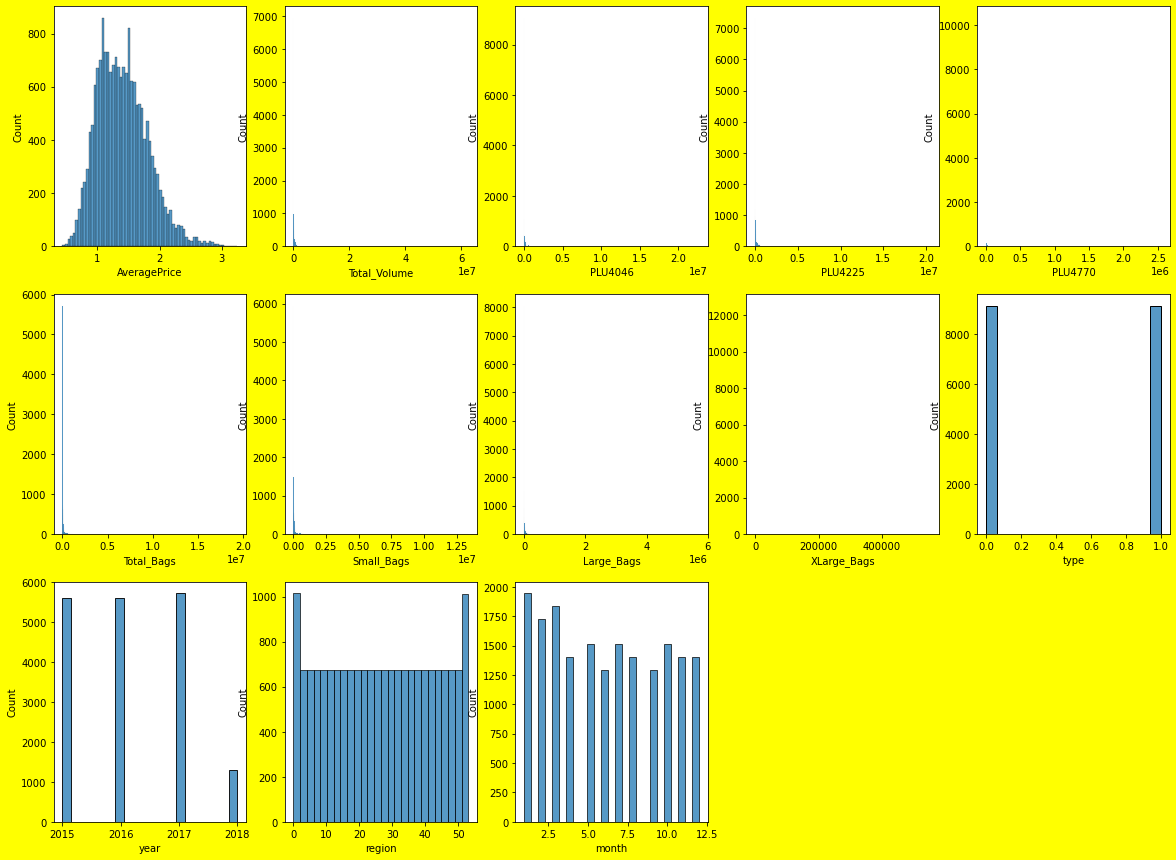

In [28]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        sns.histplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

### From the hist plot, we can observe that the data is skewed and has a large number of outliers are present in dataset.

###  Plotting Disrtibution plot to see how data is distributed

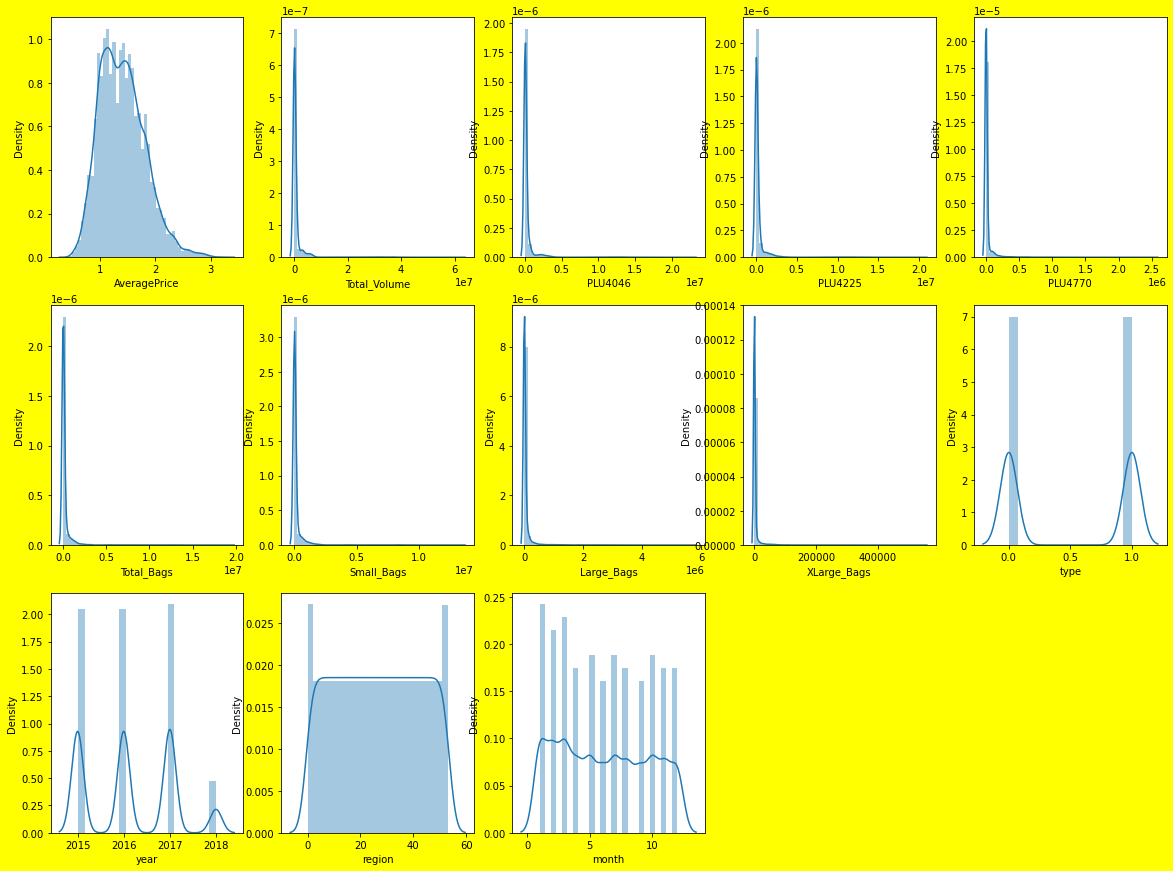

In [29]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

###  Same we can confirm with the help of a distribution plot that the data is skewed and has a large number of outliers present in the dataset.

#### Splitting the dataset 

In [30]:
X = df.drop(['AveragePrice'],axis = 1)
y = df['AveragePrice']

###  Plotting Scatter plot to see realtion between feature and label

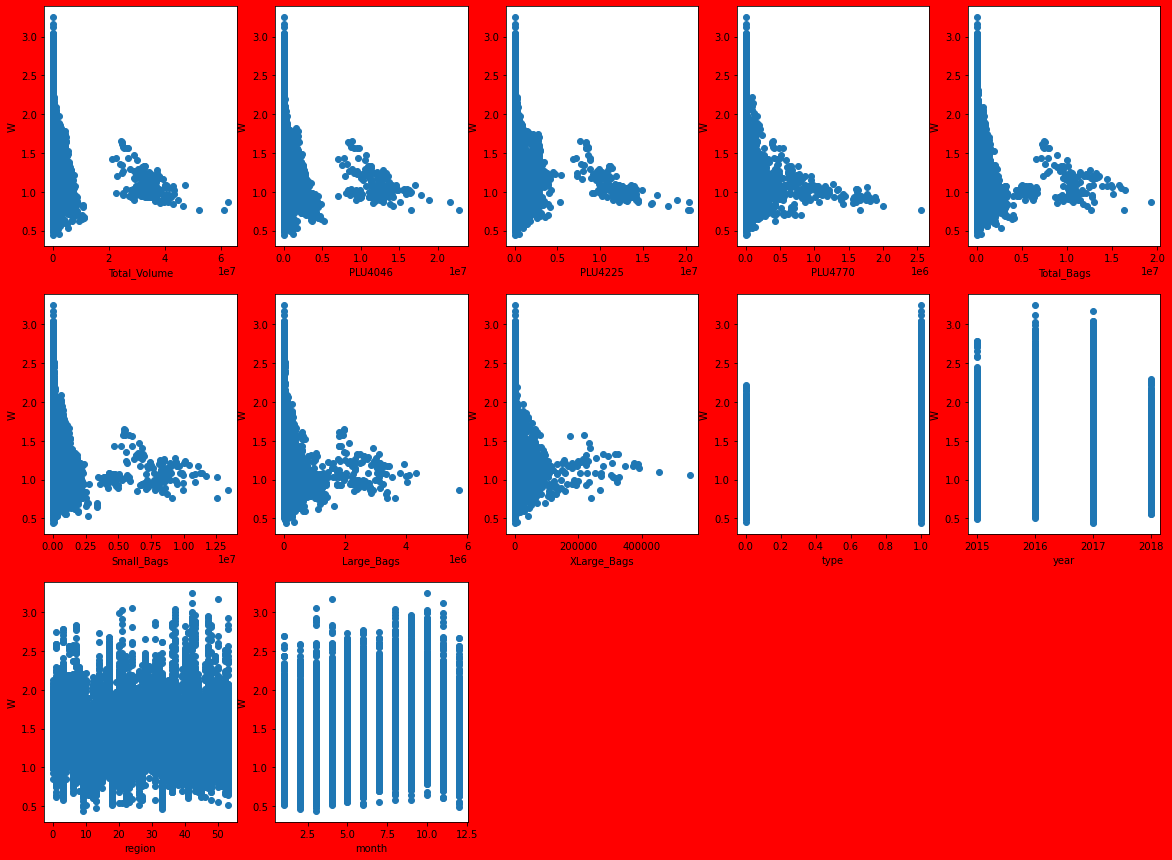

In [31]:
# so find relationship between feature(X) and label(y) by visulization using scatter plot

plt.figure(figsize = (20,15) , facecolor = 'red')
plotnumber = 1

for column in X:   #here feature is new X so X
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        plt.scatter(X[column] , y)
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('W' , fontsize = 10)
    plotnumber += 1
plt.show()

### From the scatter plot we can observe the relation between feature and label and we observe every feature is negatively correlated to the label except type, month, and year which are positively correlated to the label.

###  Plotting Regression plot to see realtion between feature and label

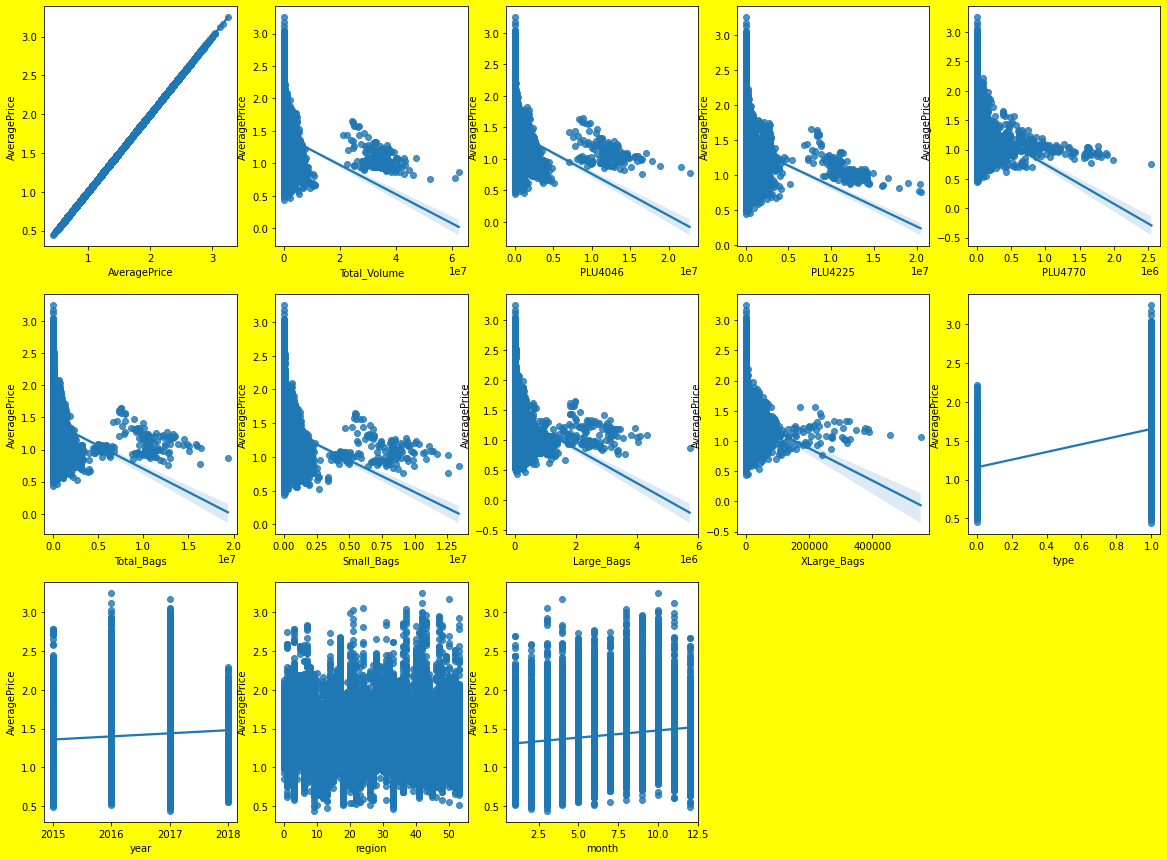

In [32]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        sns.regplot (df[column],y)
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

### From the scatter plot we can observe the relation between feature and label and we observe every feature is negatively correlated to the label except type, month, and year which are positively correlated to the label.

###  Plotting Box plot to see outliers are present are not

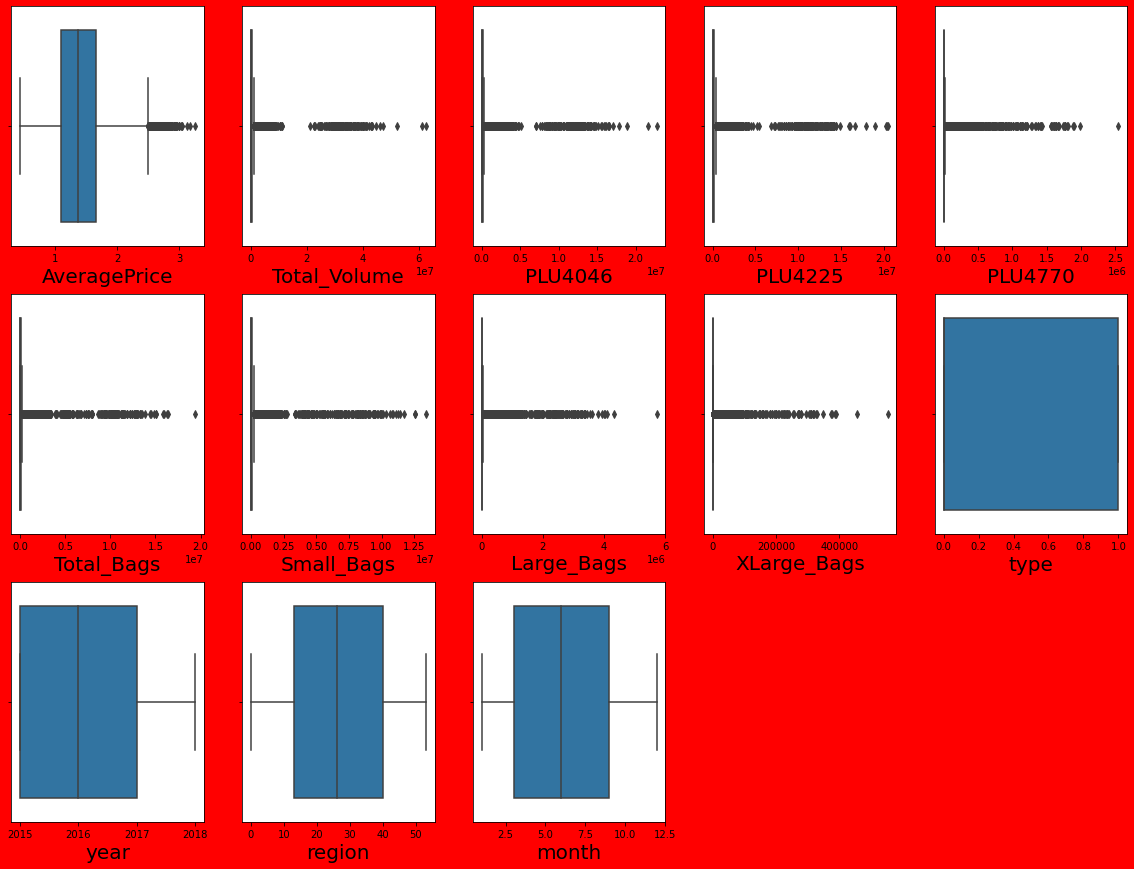

In [33]:
plt.figure(figsize=(20,15) , facecolor = 'red')
graph = 1

for column in df:
    
    if graph <= 15:
        plt.subplot (3,5,graph)
        ax = sns.boxplot(df[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

### We use a boxplot to see the outliers and we observe the dataset contains huge numbers of outliers.

#### Treating the outliers

In [34]:
import numpy as np
from numpy import percentile

columns = df.columns
for j in columns:
    if isinstance(df[j][0], str) :
        continue
    else:
        #defining quartiles
        quartiles = percentile(df[j], [25,75])
        # calculate min/max
        lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
        upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
        df[j] = df[j].apply(lambda x: upper_fence if x > upper_fence else (lower_fence if x < lower_fence else x))

### Plotting Box plot after treating outliers

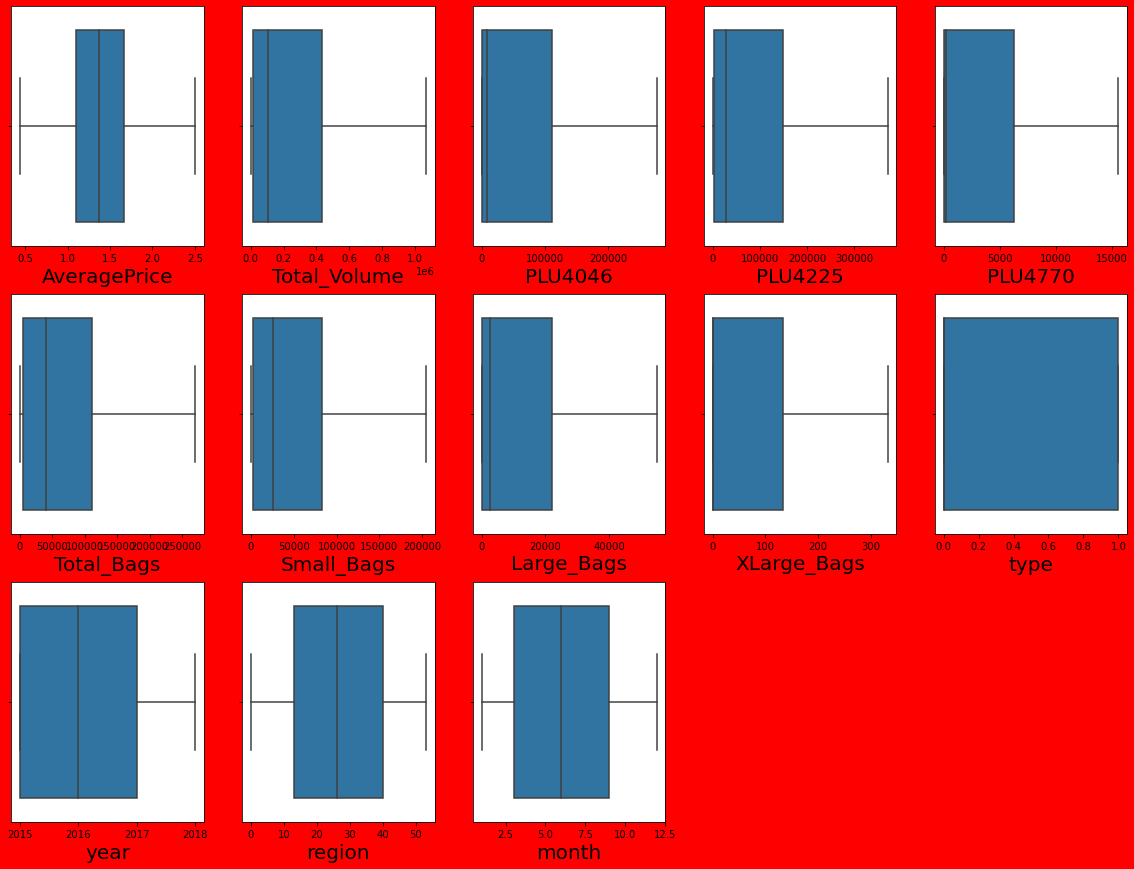

In [35]:
plt.figure(figsize=(20,15) , facecolor = 'red')
graph = 1

for column in df:
    
    if graph <= 15:
        plt.subplot (3,5,graph)
        ax = sns.boxplot(df[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

### After treating the outliers the dataset looks good and we can proceed to the next step which is data scaling.

### Scaling the dataset

In [36]:
#scale our data using standard sclar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

### Checking for the multicollinearity Using VIF

In [37]:
# now we check for multicolinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()  #creating empty dataframe

vif['vif']=[variance_inflation_factor(X_scaled , i) for i in range(X_scaled.shape[1])]  


# for above code first it will execute for statement and shape[1] give all columns and store in i then it will pass to vif 
##  in that we already have X_scaled so it will compare feature vs feature

vif['features']=X.columns  # seperate column for column features

vif

,vif,features
0,4.926454e+09,Total_Volume
1,6.609586e+08,PLU4046
2,5.988830e+08,PLU4225
3,4.770254e+06,PLU4770
4,2.370316e+14,Total_Bags
5,1.364727e+14,Small_Bags
6,1.450435e+13,Large_Bags
7,7.622368e+10,XLarge_Bags
8,1.061744e+00,type
9,1.084430e+00,year


In [39]:
# finding correlation between feature n lable using CORR method
#  (code type      --   feature corrwith label)

df.drop('AveragePrice' , axis =1 ).corrwith (df.AveragePrice)

Total_Volume   -0.508013
PLU4046        -0.529095
PLU4225        -0.416055
PLU4770        -0.470443
Total_Bags     -0.490911
Small_Bags     -0.452942
Large_Bags     -0.428966
XLarge_Bags    -0.355443
type            0.621292
year            0.091885
region         -0.015144
month           0.161962
dtype: float64

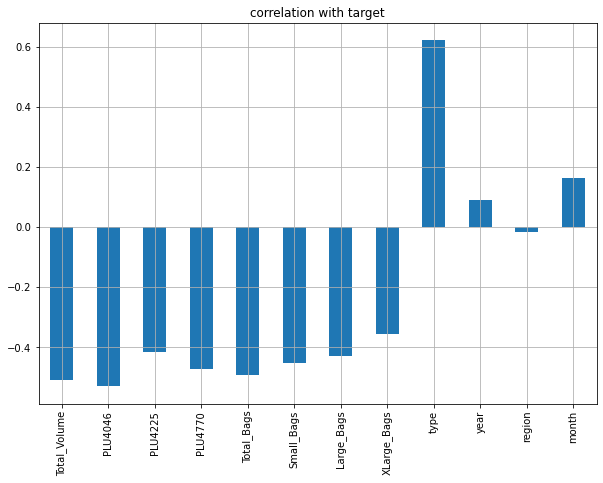

In [40]:
# convert above numbers into graph for better understanding
df.drop('AveragePrice' , axis = 1).corrwith (df.AveragePrice).plot(kind = 'bar' , grid=True , figsize = (10,7) , title = 'correlation with target')

plt.show()

### The above graphs show the relation with the target variable only type, year and month are positively correlated and the rest are negatively correlated.

In [157]:
# dropping columns because VIF is greater than 5
X = df.drop(['PLU4046','PLU4225','XLarge_Bags','AveragePrice'],axis = 1)
X

,Total_Volume,PLU4770,Total_Bags,Small_Bags,Large_Bags,type,year,region,month
0,64236.62,48.16,8696.87,8603.62,93.25,conventional,2015,Albany,12
1,54876.98,58.33,9505.56,9408.07,97.49,conventional,2015,Albany,12
2,118220.22,130.50,8145.35,8042.21,103.14,conventional,2015,Albany,12
3,78992.15,72.58,5811.16,5677.40,133.76,conventional,2015,Albany,12
4,51039.60,75.78,6183.95,5986.26,197.69,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...
18244,17074.83,0.00,13498.67,13066.82,431.85,organic,2018,WestTexNewMexico,2
18245,13888.04,0.00,9264.84,8940.04,324.80,organic,2018,WestTexNewMexico,1
18246,13766.76,727.94,9394.11,9351.80,42.31,organic,2018,WestTexNewMexico,1
18247,16205.22,727.01,10969.54,10919.54,50.00,organic,2018,WestTexNewMexico,1


In [42]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

# Linear Regression Model

In [43]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Finding best random state

In [44]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    regression=LinearRegression()
    regression.fit(X_train,y_train)
    
    pred=regression.predict(X_train)
    training=regression.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=regression.predict(X_test)
    testing=regression.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 46.643884111331126 RandomState 0
Testing Score 46.47211042987336 RandomState 0


MAXINING TESTING SCORE 46.47211042987336 ON RANDOM STATE OF 0
Training Score 46.34191790144229 RandomState 1
Testing Score 47.48132195388243 RandomState 1


MAXINING TESTING SCORE 47.48132195388243 ON RANDOM STATE OF 1
Training Score 47.05059768812632 RandomState 2
Testing Score 45.30495660406297 RandomState 2


Training Score 46.662494334779005 RandomState 3
Testing Score 46.51754088194524 RandomState 3


Training Score 46.779747643905765 RandomState 4
Testing Score 46.158838022337754 RandomState 4


Training Score 46.68557207905235 RandomState 5
Testing Score 46.36828140526711 RandomState 5


Training Score 46.38448135069467 RandomState 6
Testing Score 47.35606874599023 RandomState 6


Training Score 46.75976701002873 RandomState 7
Testing Score 46.21454315769989 RandomState 7


Training Score 46.74420589732845 RandomState 8
Testing Score 46.221112448480106 RandomState 8


Training Score 4

In [45]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 49.00275035013363 ON RANDOM STATE OF 113


In [46]:
#splliting our data into train test split and randomstate 6
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=113)

In [47]:
#Training the data on Linear Regression Model
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [48]:
#training score
regression.score(X_train,y_train)  

0.4581030463117579

In [49]:
#testing score
regression.score(X_test,y_test) 

0.4900275035013363

##  Model Score
* Training Score = 45.81030463117579 %
* Testing Score = 49.00275035013363 %

In [50]:
y_pred=regression.predict(X_test)
y_pred

array([1.60168937, 1.1988951 , 1.25293208, ..., 1.36031745, 1.72423218,
       1.62558181])

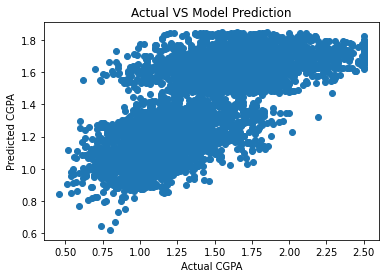

In [51]:
# how our pred vs actual look like in graph 
plt.scatter(y_test , y_pred)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual VS Model Prediction')
plt.show()

## Checking MAE , MSE & RMSE scores

In [52]:
#error in terms of numbers
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [53]:
# again predict 
y_pred = regression.predict(X_test)

In [54]:
#MAE
mean_absolute_error(y_test,y_pred)

0.2203814537630463

In [55]:
#MSE
mean_squared_error(y_test,y_pred)

0.08000547693400982

In [56]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.2828523942518603

## Scores
* MAE SCORE = 0.2203814537630463
* MSE SCORE = 0.08000547693400982
* RMSE SCORE = 0.2828523942518603

## LASSO MODEL

In [57]:
#import library
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [58]:
##### LASSO MODEL######

lasscv = LassoCV(alphas = None , max_iter = 100, normalize = True)

lasscv.fit(X_train , y_train)

LassoCV(max_iter=100, normalize=True)

In [59]:
# best aplha parameter
alpha = lasscv.alpha_
alpha

2.068198398077278e-06

In [60]:
# now we have best parametr noe train according to it
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=2.068198398077278e-06)

In [61]:
# now check r2 score
lasso_reg.score(X_test,y_test)

0.4900266987066054

## RIDGE MODEL

In [62]:
############ RIDGE MODEL#########

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)
ridgecv.fit(X_train , y_train)


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [63]:
# best aplha parameter
alpha = ridgecv.alpha_
alpha

0.001

In [64]:
# now we have best parametr noe train according to it
ridge_reg = Ridge(alpha)
ridge_reg.fit (X_train,y_train)

Ridge(alpha=0.001)

In [65]:
# now check r2 score
ridge_reg.score(X_test,y_test)

0.4900274908694283

##  SCORES
* LASSO SCORES = 49.00266987066054 %
* RIDGE SCORES = 49.00274908694283 %

## Cross-Validation

In [66]:
#Cross Vaildation
training=regression.score(X_train,y_train)
testing=regression.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(regression,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is -1.3572605870250967 and the R2 score for Training is 0.4581030463117579 and R2 score for the Testing is0.4900275035013363


At cross fold 3 the cv score is -0.05686424613718977 and the R2 score for Training is 0.4581030463117579 and R2 score for the Testing is0.4900275035013363


At cross fold 4 the cv score is -0.10888782824036583 and the R2 score for Training is 0.4581030463117579 and R2 score for the Testing is0.4900275035013363


At cross fold 5 the cv score is 0.02732061542980695 and the R2 score for Training is 0.4581030463117579 and R2 score for the Testing is0.4900275035013363


At cross fold 6 the cv score is -0.10783396440943448 and the R2 score for Training is 0.4581030463117579 and R2 score for the Testing is0.4900275035013363


At cross fold 7 the cv score is 0.0062127617403412915 and the R2 score for Training is 0.4581030463117579 and R2 score for the Testing is0.4900275035013363


At cross fold 8 the cv score is -0.05314309584675657 and th

## Cross-Validation Score
* Training Score = 45.81030463117579 %
* Testing Score = 49.00275035013363 %

# AdaBoostRegressor Model

In [67]:
# IMPORT LIBRARY 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Finding the best random state

In [68]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    ada=AdaBoostRegressor()
    ada.fit(X_train,y_train)
    
    pred=ada.predict(X_train)
    training=ada.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=ada.predict(X_test)
    testing=ada.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 55.14694202149306 RandomState 0
Testing Score 53.69649742047642 RandomState 0


MAXINING TESTING SCORE 53.69649742047642 ON RANDOM STATE OF 0
Training Score 53.67650688969965 RandomState 1
Testing Score 54.21115218225923 RandomState 1


MAXINING TESTING SCORE 54.21115218225923 ON RANDOM STATE OF 1
Training Score 54.65958048273705 RandomState 2
Testing Score 53.021051701582856 RandomState 2


Training Score 53.29513433752736 RandomState 3
Testing Score 52.548246960290015 RandomState 3


Training Score 54.70838595209505 RandomState 4
Testing Score 54.11434458266544 RandomState 4


Training Score 55.66569939519974 RandomState 5
Testing Score 56.27636208636715 RandomState 5


MAXINING TESTING SCORE 56.27636208636715 ON RANDOM STATE OF 5
Training Score 55.154876686436616 RandomState 6
Testing Score 54.86654596077414 RandomState 6


Training Score 54.518205793968775 RandomState 7
Testing Score 54.16019444209466 RandomState 7


Training Score 55.02124400830054 RandomState 8
Tes

In [69]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 57.197397747055525 ON RANDOM STATE OF 12


### Training the model

In [70]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)

In [71]:
# adaboost inilize
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [72]:
 # model prediction on training dataset
y_pred = ada.predict(X_train)

In [73]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.5530929407901302


In [74]:
# model prediction on testing datadet
pred = ada.predict(X_test)

In [75]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.5674764610412946


##  Model Scores
* Training Score = 55.30929407901302 %
* testing Score = 56.74764610412946 %

## Hyperparameter Tuning for Ada Boost

In [76]:
### HYPERPARAMETER TUNING ###
from sklearn.model_selection import RandomizedSearchCV

In [77]:
params = {'n_estimators': [45,47,53,55,60,70] , 
          'learning_rate':[0.25,0.30,0.40]}

In [78]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor() , cv=5 , param_distributions=params , n_jobs=-1)

In [79]:
rnd_srch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [45, 47, 53, 55, 60,
                                                         70]})

In [80]:
rnd_srch.best_params_

{'n_estimators': 45, 'learning_rate': 0.4}

In [81]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=45)

In [82]:
ada = AdaBoostRegressor(learning_rate=0.4, n_estimators=45)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

print ('=== Testing Score ===')
print (metrics.r2_score(y_test,y_pred))

=== Testing Score ===
0.5577353675048988


## Model Score after Hyperparameter Tuning
* Testing Score = 55.77353675048988 %

## Cross Validation for Ada Boost

In [83]:
#Cross Vaildation
training=ada.score(X_train,y_train)
testing=ada.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(ada,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is -1.9762608695413033 and the R2 score for Training is 0.5480982990346711 and R2 score for the Testing is0.5577353675048988


At cross fold 3 the cv score is -0.02952290994697922 and the R2 score for Training is 0.5480982990346711 and R2 score for the Testing is0.5577353675048988


At cross fold 4 the cv score is -0.13168160663127285 and the R2 score for Training is 0.5480982990346711 and R2 score for the Testing is0.5577353675048988


At cross fold 5 the cv score is 0.0014520610179239446 and the R2 score for Training is 0.5480982990346711 and R2 score for the Testing is0.5577353675048988


At cross fold 6 the cv score is -0.07170991648776887 and the R2 score for Training is 0.5480982990346711 and R2 score for the Testing is0.5577353675048988


At cross fold 7 the cv score is 0.050182505317718444 and the R2 score for Training is 0.5480982990346711 and R2 score for the Testing is0.5577353675048988


At cross fold 8 the cv score is 0.000794797718934509 and t

##  Cross Validation score
* Training score = 54.80982990346711 %
* Testing Score = 55.77353675048988 %

# RandomForestRegressor Model

In [84]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Finding the best random state

In [85]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(X_train,y_train)
    
    pred=rf.predict(X_train)
    training=rf.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=rf.predict(X_test)
    testing=rf.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 98.21902144213334 RandomState 0
Testing Score 87.48835950028719 RandomState 0


MAXINING TESTING SCORE 87.48835950028719 ON RANDOM STATE OF 0
Training Score 98.21932385703866 RandomState 1
Testing Score 88.45297423861001 RandomState 1


MAXINING TESTING SCORE 88.45297423861001 ON RANDOM STATE OF 1
Training Score 98.22054150235961 RandomState 2
Testing Score 87.43914281393772 RandomState 2


Training Score 98.22135787242972 RandomState 3
Testing Score 87.97829923247025 RandomState 3


Training Score 98.18561575401404 RandomState 4
Testing Score 87.61982032393894 RandomState 4


Training Score 98.21506494336433 RandomState 5
Testing Score 88.15174551125364 RandomState 5


Training Score 98.15847821693427 RandomState 6
Testing Score 88.05345946251883 RandomState 6


Training Score 98.2186412875354 RandomState 7
Testing Score 88.143595832986 RandomState 7


Training Score 98.18890542702108 RandomState 8
Testing Score 87.83846467463785 RandomState 8


Training Score 98.204577

In [86]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 89.25287411283631 ON RANDOM STATE OF 161


### Training the model

In [87]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=161)

In [88]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [89]:
 # model prediction on training dataset
y_pred = rf.predict(X_train)

In [90]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9821216756388084


In [91]:
# model prediction on testing datadet
pred = rf.predict(X_test)

In [92]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.8924642077520228


##  Model Score
* Training Score = 98.21216756388084 %
* Testing Score = 89.24642077520228 %

##  Hyperparameter tuning for Random Forest

In [93]:
# RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [94]:
# define parameters
parameters={'criterion':['mse','mae','poisson'],
           'max_features':['auto','sqrt','log2'],
           'min_samples_split':[1,11],
           'max_depth':[1,15],
           'min_samples_leaf':[1,7]}

In [95]:
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_depth': [1, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 7],
                         'min_samples_split': [1, 11]})

In [96]:
#print best parameters
print(clf.best_params_)

{'criterion': 'poisson', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 11}


In [97]:
#reassign best parameters
rf=RandomForestRegressor(criterion= 'poisson', max_depth= 15, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 11)
rf.fit(X_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=15, max_features='auto',
                      min_samples_split=11)

In [98]:
print ('Training R2 Score: ' ,rf.score(X_train,y_train)*100)

Training R2 Score:  94.40284317677717


In [101]:
pred_decision=rf.predict(X_test)
from sklearn.metrics import r2_score
rfs = r2_score(y_test,pred_decision)

In [102]:
print('Testing R2 Score:' , rfs*100)

Testing R2 Score: 87.56611961931124


## Model Score after Hyperparameter Tuning
* Training Score = 94.40284317677717 %
* Testing Score = 87.56611961931124 %

##  Cross Validation for Random Forest

In [103]:
#Cross Vaildation
training=rf.score(X_train,y_train)
testing=rf.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rf,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is -1.6652688614131468 and the R2 score for Training is 0.9440284317677717 and R2 score for the Testing is0.8756611961931123


At cross fold 3 the cv score is -0.2403740118092541 and the R2 score for Training is 0.9440284317677717 and R2 score for the Testing is0.8756611961931123


At cross fold 4 the cv score is -0.0021837509375348396 and the R2 score for Training is 0.9440284317677717 and R2 score for the Testing is0.8756611961931123


At cross fold 5 the cv score is 0.1430410515107595 and the R2 score for Training is 0.9440284317677717 and R2 score for the Testing is0.8756611961931123


At cross fold 6 the cv score is -0.160248780417752 and the R2 score for Training is 0.9440284317677717 and R2 score for the Testing is0.8756611961931123


At cross fold 7 the cv score is 0.2940784414043066 and the R2 score for Training is 0.9440284317677717 and R2 score for the Testing is0.8756611961931123


At cross fold 8 the cv score is 0.21600221700195074 and the R2 s

## Cross Validation score
* Training score = 94.40284317677717 %
* Testing Score = 87.56611961931123 %

# GradientBoostingRegressor Model

In [104]:
# import library

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile , chi2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor


## Finding the best random state

In [105]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    gbdt=GradientBoostingRegressor()
    gbdt.fit(X_train,y_train)
    
    pred=gbdt.predict(X_train)
    training=gbdt.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=gbdt.predict(X_test)
    testing=gbdt.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 75.39355006543332 RandomState 0
Testing Score 73.5824853352572 RandomState 0


MAXINING TESTING SCORE 73.5824853352572 ON RANDOM STATE OF 0
Training Score 75.20645762849499 RandomState 1
Testing Score 74.41460740473913 RandomState 1


MAXINING TESTING SCORE 74.41460740473913 ON RANDOM STATE OF 1
Training Score 75.61687558502125 RandomState 2
Testing Score 73.21556559936593 RandomState 2


Training Score 75.13462837637046 RandomState 3
Testing Score 74.42803297529615 RandomState 3


MAXINING TESTING SCORE 74.42803297529615 ON RANDOM STATE OF 3
Training Score 75.0308823676573 RandomState 4
Testing Score 73.25203193246062 RandomState 4


Training Score 75.14325814066237 RandomState 5
Testing Score 74.51325652143618 RandomState 5


MAXINING TESTING SCORE 74.51325652143618 ON RANDOM STATE OF 5
Training Score 75.20127392745985 RandomState 6
Testing Score 74.1113988674701 RandomState 6


Training Score 74.91109116109986 RandomState 7
Testing Score 74.330435570175 RandomState 7


In [106]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 75.66431316655016 ON RANDOM STATE OF 161


### Training the model

In [107]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=161)

In [108]:
# initiate GradientBoostingClassifier
gbdt= GradientBoostingRegressor()
gbdt.fit(X_train , y_train)

GradientBoostingRegressor()

In [109]:
 # model prediction on training dataset
y_pred = gbdt.predict(X_train)

In [110]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.7503896269287289


In [111]:
# model prediction on testing datadet
pred = gbdt.predict(X_test)

In [112]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.7566431316655016


## Model Score
* Training Score = 75.03896269287289 %
* Testing Score = 75.66431316655016 %

##  Hyperparameter tuning for GradientBoostingRegressor

In [113]:
# HYPERPARAMETER TUNING #
from sklearn.model_selection import GridSearchCV

In [114]:
# internally it will use decision tree as name suggest GBDT and here we are going to add one new parameter i.e learning rate 

grid_params = {'max_depth' : range(1,8),
               'min_samples_split': range(2,12,1),
               'learning_rate': np.arange(0.1 , 0.9),
               'n_estimators': [90,95,100,105,110]}

In [115]:
grid = GridSearchCV(GradientBoostingRegressor() , param_grid = grid_params , n_jobs = -1)

In [116]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(1, 8),
                         'min_samples_split': range(2, 12),
                         'n_estimators': [90, 95, 100, 105, 110]})

In [117]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'min_samples_split': 5,
 'n_estimators': 110}

In [118]:
gbdt_clf = GradientBoostingRegressor(learning_rate= 0.1,
 max_depth= 7,
 min_samples_split= 5,
 n_estimators= 110)

In [119]:
gbdt_clf.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=7, min_samples_split=5, n_estimators=110)

In [120]:
 # model prediction on training dataset
y_pred = gbdt_clf.predict(X_train)

In [121]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9466891512739657


In [122]:
# model prediction on testing datadet
pred = gbdt_clf.predict(X_test)

In [123]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.8977885600911957


## Model Score after Hyperparameter Tuning
* Training Score = 94.66891512739657 %
* Testing Score = 89.77885600911957 %

# All model score after hyperparameter tuning

** Linear Regression Model

    Training Score = 45.81030463117579 %

    Testing Score = 49.00275035013363 %


** AdaBoostRegressor Model

    Testing Score = 55.77353675048988 %


** RandomForestRegressor Model 

    Training Score = 94.40284317677717 %

    Testing Score = 87.56611961931124 %


** GradientBoostingRegressor Model

    Training Score = 94.66891512739657 %

    Testing Score = 89.77885600911957 %